### Importación de datos



In [133]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda2.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Silla de oficina,Muebles,283600.0,15300.0,04/08/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
1,Pandereta,Instrumentos musicales,76800.0,2300.0,26/11/2020,Blanca Ramirez,Medellín,3,Tarjeta de crédito,4,6.25184,-75.56359
2,Cama king,Muebles,443300.0,23800.0,22/10/2021,Izabela de León,Pereira,5,Tarjeta de crédito,10,4.81333,-75.69611
3,Cama king,Muebles,906200.0,46400.0,04/05/2022,Maria Alfonso,Cali,5,Tarjeta de crédito,10,3.43722,-76.52250
4,Silla de oficina,Muebles,397800.0,19400.0,26/02/2022,Lucas Olivera,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175


#1. Análisis de facturación



In [134]:
# Añdimos una columna para identificar cada tienda (Tienda1,2,3,4)
tienda['Tienda'] ='Tienda1'
tienda2['Tienda'] ='Tienda2'
tienda3['Tienda'] ='Tienda3'
tienda4['Tienda'] ='Tienda4'
tienda['Tienda'].head()

,Tienda
0,Tienda1
1,Tienda1
2,Tienda1
3,Tienda1
4,Tienda1


Ingreso total por cada tienda: 

Tienda1 : $1,150,880,400.0
Tienda2 : $1,116,343,500.0
Tienda3 : $1,098,019,600.0
Tienda4 : $1,038,375,700.0
Total Ingreso = $4,403,619,200.0


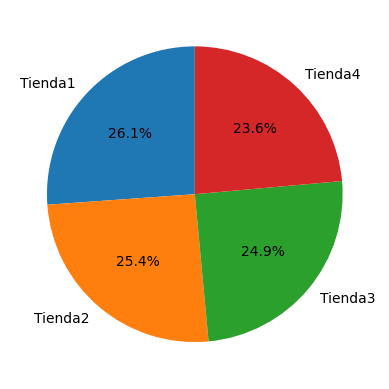

In [135]:
# Juntamos todos los Dataframe en 'Tiendas' para analizarlo en general
TotalPrecio = []
Tiendas2=[]
Total=0
Tiendas = [tienda,tienda2,tienda3,tienda4]

print('Ingreso total por cada tienda: \n')
for tnd in Tiendas:
  SumaTotal = sum(tnd['Precio'])
  Total +=SumaTotal
  print(f'{tnd["Tienda"][1]} : ${format(SumaTotal,",")}')
  Tiendas2.append(tnd["Tienda"][1])
  TotalPrecio.append(SumaTotal)

print(f'Total Ingreso = ${format(Total,",")}')
plt.pie(TotalPrecio,autopct='%1.1f%%',labels = Tiendas2,startangle=90)
plt.show()


In [136]:
# Opcional para revisarlo en Excel :
  # Exporte el dataframe en un excel para verificar los datos total
  # Tiendas.to_excel('Prueba.xlsx',index=False)


# 2. Ventas por categoría

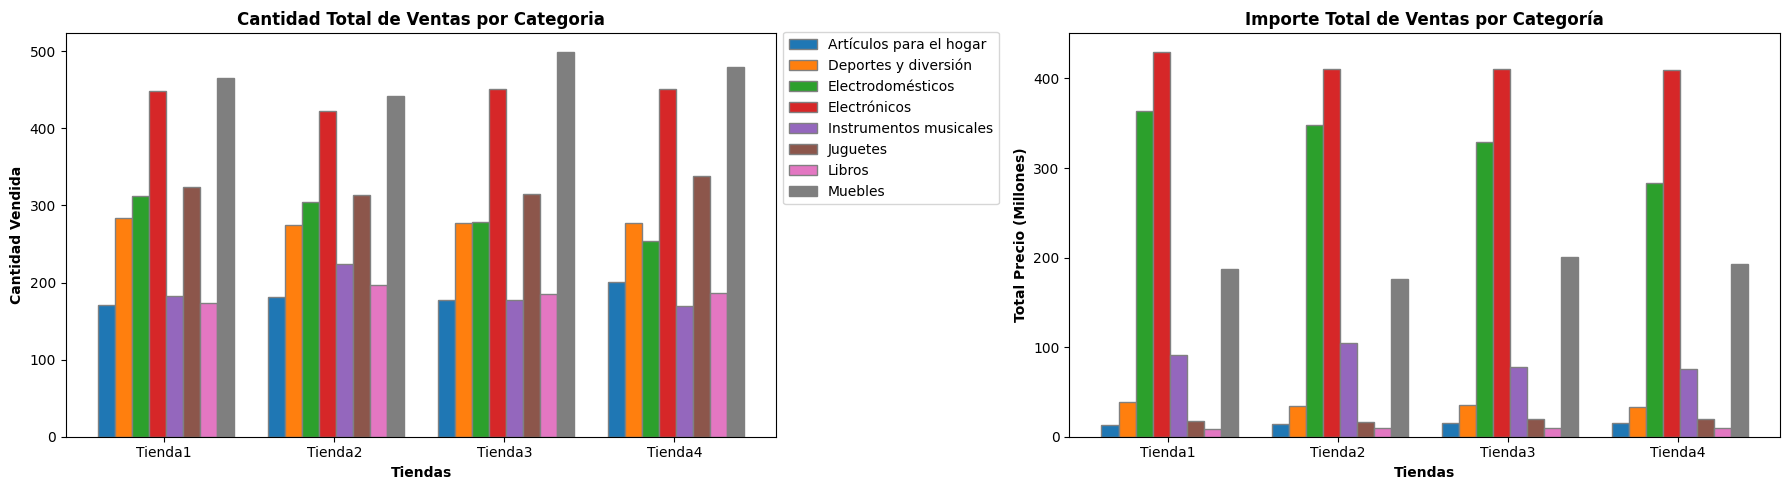



Tabla de Cantidad Total de Ventas por categoria


Categoría del Producto,Tienda,Artículos para el hogar,Deportes y diversión,Electrodomésticos,Electrónicos,Instrumentos musicales,Juguetes,Libros,Muebles
0,Tienda1,171,284,312,448,182,324,173,465
1,Tienda2,181,275,305,422,224,313,197,442
2,Tienda3,177,277,278,451,177,315,185,499
3,Tienda4,201,277,254,451,170,338,187,480


In [137]:
# Nuevamente unimos las Tiendas pero usando funciones de Pandas
Tiendas = pd.concat([tienda,tienda2,tienda3,tienda4])

#                   Grafico Cantidad de Ventas
# grupo para resumir las categorias por tienda , Cantidad Vendida
Cntd_Venta_Catg = Tiendas.groupby(["Tienda","Categoría del Producto"]).agg(Cantidad_Ventas=('Tienda','count'))
Cntd_Venta_Catg = Cntd_Venta_Catg.reset_index()
Cntd_Venta_Catg_pvt = Cntd_Venta_Catg.pivot(index="Tienda",columns="Categoría del Producto",values="Cantidad_Ventas").reset_index()
# Creando 2 graficos en la misma fila , referencia Eje
fig, Eje = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))
Constante = 0.1  # Ancho de cada barra
RangoTemp = []
for Categoria in Cntd_Venta_Catg_pvt:
  if Categoria != "Tienda":
    # Al iniciar el Bucle se crea la lista
    if len(RangoTemp)==0 :
      RangoTemp = [x+1 for x in list(Cntd_Venta_Catg_pvt['Tienda'].index)]
    else:
    # una vez creada la lista comenzamos a sumar los datos de la lista anterior
      RangoTemp = [x+0.1 for x in RangoTemp]
    # print(RangoTemp)
    # cambiamos el formato de los precios ya que se guardaron como Objeto y deberian ser Float
    Eje[0].bar(RangoTemp, [float(x) for x in Cntd_Venta_Catg_pvt[Categoria]],width=Constante,edgecolor='grey',label=Categoria)

Eje[0].set_xticks([x + Constante *3.4 for x in range(1,len(RangoTemp)+1)],Cntd_Venta_Catg_pvt['Tienda'])
# Etiquetas al eje X
Eje[0].set_xlabel('Tiendas',fontweight='bold')
# Etiquetas al eje Y
Eje[0].set_ylabel('Cantidad Vendida', fontweight='bold')
# Añadir título al gráfico
Eje[0].set_title('Cantidad Total de Ventas por Categoria', fontweight='bold')
# Añadir leyenda
Eje[0].legend(bbox_to_anchor=(1, 1.02), ncol=1)
# Mostrar el gráfico
# plt.show()


#               GRafico para el Precio
# grupo para resumir las categorias por tienda , Total Precio
ListaCategorias = Tiendas.groupby(["Tienda","Categoría del Producto"]).agg(Total_Precio=('Precio','sum'))
# agregamos indices para que sea un Dataframe normal
ListaCategorias = ListaCategorias.reset_index()
# Ordenamos por tienda y precio descendente
ListaCategorias.sort_values(by=['Tienda','Total_Precio'],ascending=[True,False],inplace=True)

ListaCategorias['Total_Precio'] = (ListaCategorias['Total_Precio'] /1000000).map(lambda x: f'{x:.2f}')

#Cambiamos de popsicion al dataframe con Pivot
Lista_pivot = ListaCategorias.pivot(index="Tienda",columns="Categoría del Producto",values="Total_Precio").reset_index()

Tiendas_name = Lista_pivot['Tienda']

RangoTemp = []
# Medida del Grafio X,Y
# plt.figure(figsize=(10,6))

for Categoria in Lista_pivot:
  if Categoria != "Tienda":
    # Al iniciar el Bucle se crea la lista
    if len(RangoTemp)==0 :
      RangoTemp = [x+1 for x in list(Tiendas_name.index)]
    else:
    # una vez creada la lista comenzamos a sumar los datos de la lista anterior
      RangoTemp = [x+0.1 for x in RangoTemp]
    # print(RangoTemp)
    # cambiamos el formato de los precios ya que se guardaron como Objeto y deberian ser Float
    Eje[1].bar(RangoTemp, [float(x) for x in Lista_pivot[Categoria]],width=Constante,edgecolor='grey',label=Categoria)

Eje[1].set_xticks([x + Constante *3.4 for x in range(1,len(RangoTemp)+1)],Lista_pivot['Tienda'])
# Etiquetas al eje X
Eje[1].set_xlabel('Tiendas',fontweight='bold')
# Etiquetas al eje Y
Eje[1].set_ylabel('Total Precio (Millones)', fontweight='bold')
# Añadir título al gráfico
Eje[1].set_title('Importe Total de Ventas por Categoría', fontweight='bold')
# Añadir leyenda
# Eje[1].legend(bbox_to_anchor=(1, 1.02), ncol=1)
# Ajustar el layout para que las etiquetas no se superpongan
plt.tight_layout()



# Mostrar el gráfico
plt.show()
print('\n\nTabla de Cantidad Total de Ventas por categoria')
Cntd_Venta_Catg_pvt



# 3. Calificación promedio de la tienda


In [138]:
Tiendas = [tienda,tienda2,tienda3,tienda4]
print('Calificación Promedio de Tiendas : ' )
for tda in Tiendas:
  tda_tmp = tda['Tienda'][0]
  Prom = tda['Calificación'].mean()
  print(f'{tda_tmp} = {round(Prom,2)}')

Calificación Promedio de Tiendas : 
Tienda1 = 3.98
Tienda2 = 4.04
Tienda3 = 4.05
Tienda4 = 4.0


# 4. Productos más y menos vendidos

In [139]:
Tiendas = [tienda,tienda2,tienda3,tienda4]
ListaPorductos_Max=[]
ListaCantVentas_Max=[]
ListaPorductos_Min=[]
ListaCantVentas_Min=[]
for Tda in Tiendas:
  Productos = list(Tda['Producto'].unique())
  ListaValores = list(Tda['Producto'].values)
  CantidadVentas = [ListaValores.count(x) for x in Productos]
  NumeroMax = max(CantidadVentas)
  NumeroMin= min(CantidadVentas)
  for valor in enumerate(CantidadVentas):
    if valor[1] == NumeroMax:
      ListaPorductos_Max.append(Productos[valor[0]])
      ListaCantVentas_Max.append(valor[1])
      # print(f'El indice es  = {valor[0]} de  {valor[1]} \tproducto es = {Productos[valor[0]]} ')
    elif valor[1] == NumeroMin:
      ListaPorductos_Min.append(Productos[valor[0]])
      ListaCantVentas_Min.append(valor[1])
  print(f'{Tda["Tienda"][1]} \n\tLista Productos mas vendidos  : {list(zip(ListaPorductos_Max,ListaCantVentas_Max))} \n\tLista Productos menos vendidos  : {list(zip(ListaPorductos_Min,ListaCantVentas_Min))}')
  ListaPorductos_Max=[]
  ListaCantVentas_Max=[]
  ListaPorductos_Min=[]
  ListaCantVentas_Min=[]

# print(CantidadVentas)
# print(Productos)
# print(Tiendas[0]['Tienda'][1])



Tienda1 
	Lista Productos mas vendidos  : [('Microondas', 60), ('TV LED UHD 4K', 60), ('Armario', 60)] 
	Lista Productos menos vendidos  : [('Auriculares con micrófono', 33), ('Celular ABXY', 33)]
Tienda2 
	Lista Productos mas vendidos  : [('Iniciando en programación', 65)] 
	Lista Productos menos vendidos  : [('Juego de mesa', 32)]
Tienda3 
	Lista Productos mas vendidos  : [('Kit de bancas', 57)] 
	Lista Productos menos vendidos  : [('Bloques de construcción', 35)]
Tienda4 
	Lista Productos mas vendidos  : [('Cama box', 62)] 
	Lista Productos menos vendidos  : [('Guitarra eléctrica', 33)]


# 5. Envío promedio por tienda

			Valor del envío promedio por tienda
Tienda1 = $26,018.61 
Tienda2 = $25,216.24 
Tienda3 = $24,805.68 
Tienda4 = $23,459.46 


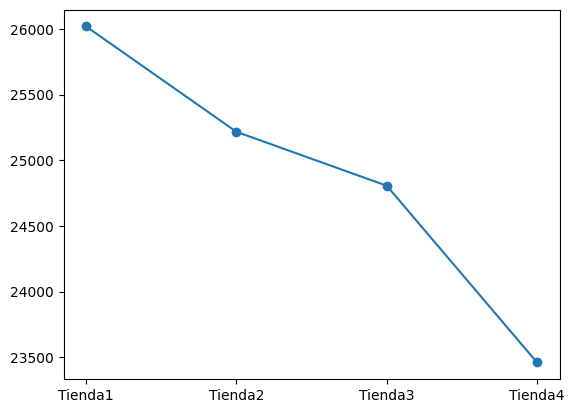

In [140]:
Tiendas = [tienda,tienda2,tienda3,tienda4]
Tdas=[]
ListaProm=[]
print('\t\t\tValor del envío promedio por tienda')
for Tda in Tiendas:
  Promedio = Tda['Costo de envío'].mean()
  print(f'{Tda["Tienda"][1]} = ${format(round(Promedio,2),",")} ')
  Tdas.append(Tda["Tienda"][1])
  ListaProm.append(Promedio)

plt.plot(Tdas,ListaProm,marker='o')
plt.show()

# **EXTRA**

In [141]:
import folium
from folium.plugins import HeatMap
from folium.plugins import FastMarkerCluster

Ubicaciones=[]
for tda in Tiendas:
  for x,y,o in zip(tda['lat'],tda['lon'],tda['Tienda']):
    Ubicaciones.append((x,y))

Ubicaciones2=list(set(Ubicaciones))


mapa = folium.Map(location=Ubicaciones[0],zoom_start=6 )

FastMarkerCluster(Ubicaciones, popup_html=False).add_to(mapa)
HeatMap(Ubicaciones2).add_to(mapa)
mapa


# **Informe Final**

Análisis comparativo de las 4 tiendas del Sr. Juan

Se llevó a cabo un análisis de las cuatro tiendas propiedad del Sr. Juan, quien solicitó un informe para identificar cuál de ellas presenta un menor rendimiento general.

A partir de esta solicitud, se evaluaron los siguientes aspectos:

Ingresos Totales:
La tienda 4 registró el menor ingreso total entre las cuatro.

Ventas por Categoría:
Aunque la tienda 4 presenta un volumen de ventas mayor en comparación con las demás, el importe total generado por esas ventas es inferior.

Calificaciones Promedio:
La tienda 1 obtuvo la calificación más baja, mientras que la tienda 4 se destacó con las mejores valoraciones por parte de los clientes.

Productos más y menos vendidos:
La tienda 1 tiene tanto productos con altos niveles de venta como otros con baja rotación, mostrando un comportamiento más variado.

Costo de Envío Promedio:
La tienda 4 se distingue por tener el costo de envío promedio más bajo entre todas las tiendas analizadas.

Conclusión:
Si bien la tienda 4 genera los ingresos más bajos, cuenta con una excelente valoración por parte de los clientes y ofrece costos de envío más competitivos. Sin embargo, dado el contexto actual y el rendimiento financiero observado, podría considerarse su venta como una opción viable, especialmente si la prioridad es optimizar la rentabilidad general del negocio. No obstante, se recomienda seguir evaluando estos indicadores a lo largo del tiempo antes de tomar una decisión definitiva.






